In [3]:
from numpy.random import choice, seed
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy import sqrt
import pandas as pd
import seaborn as sns
from itertools import chain, combinations


## The powerset of a discrete set

In [51]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [95]:
algebra = list(powerset(["HH", "HT", "TH", "TT"]))
algebra = (str(algebra)
             .replace("(", "{")
             .replace(")", "}")
             .replace("[", "{")
             .replace("]", "}")
             .replace("'", ""))

In [96]:
print(algebra)

{{}, {HH,}, {HT,}, {TH,}, {TT,}, {HH, HT}, {HH, TH}, {HH, TT}, {HT, TH}, {HT, TT}, {TH, TT}, {HH, HT, TH}, {HH, HT, TT}, {HH, TH, TT}, {HT, TH, TT}, {HH, HT, TH, TT}}


$$
\{\{\}, \{HH\}, \{HT\}, \{TH\}, \{TT\}, \{HH, HT\}, \{HH, TH\}, \{HH, TT\}, \{HT, TH\}, \{HT, TT\}, \{TH, TT\}, \{HH, HT, TH\}, \{HH, HT, TT\}, \{HH, TH, TT\}, \{HT, TH, TT\}, \{HH, HT, TH, TT\}\}
$$

In [70]:
("abc".replace("a", "-")
      .replace("b", "*"))

'-*c'

## Simulating the distribution of a brownian motion at $t=1$ (S 3.2)

In [2]:
symmetric_random_walk = lambda nsteps: np.cumsum(np.append(0, choice([-1,1], nsteps)))
scaled_random_walk  = lambda partitions, t: symmetric_random_walk(partitions * t) / sqrt(partitions)

In [2]:
symmetric_random_walk = lambda nsteps: np.cumsum(np.append(0, choice([-1,1], nsteps)))
scaled_random_walk  = lambda partitions, t: symmetric_random_walk(partitions * t) / sqrt(partitions)

In [34]:
#seed(1994)
samples = 500
partitions = [10, 20, 50, 100, 500]

vals = {}
for partition in partitions:
    # Applying LLN
    means = []
    for __ in range(samples):
        samp_values = []
        # Running the si
        for _ in range(samples):
            last_pos = scaled_random_walk(partition,1)[-1]
            # Getting values that fall between two standard deviations
            samp_values.append(last_pos)
        means.append(np.mean([abs(p) <= 2 for p in samp_values]))
            
    vals[str(partition)] = np.mean(means)

In [48]:
vals

{'10': 0.97846399999999989,
 '100': 0.96461600000000003,
 '20': 0.95863199999999993,
 '50': 0.96706399999999992,
 '500': 0.95598800000000006}

# The Ito Integral

For $f\in V[0, T]$, we define Itō's integral as
$$
    \int_0^T f(t) dW_t := \sum_{i=0}^{n-1}f(t_i)\Delta Wi
$$

Where $\Delta W_i := W_{t_{i+1} - W_{t_i}}$

In [66]:
f = np.vectorize(lambda x: x)

### Example of an stochastic Integral
$$
\int_0^T W_t dW_t = \frac{1}{2} Wt ^ 2 - \frac{1}{2} t
$$

In [120]:
Wt = np.random.normal(size=500)
t = np.linspace(0, 2, 500)

In [121]:
definition_integral = (Wt.cumsum() * Wt).cumsum()
solved_integral = Wt.cumsum() ** 2  / 2 - t / 2

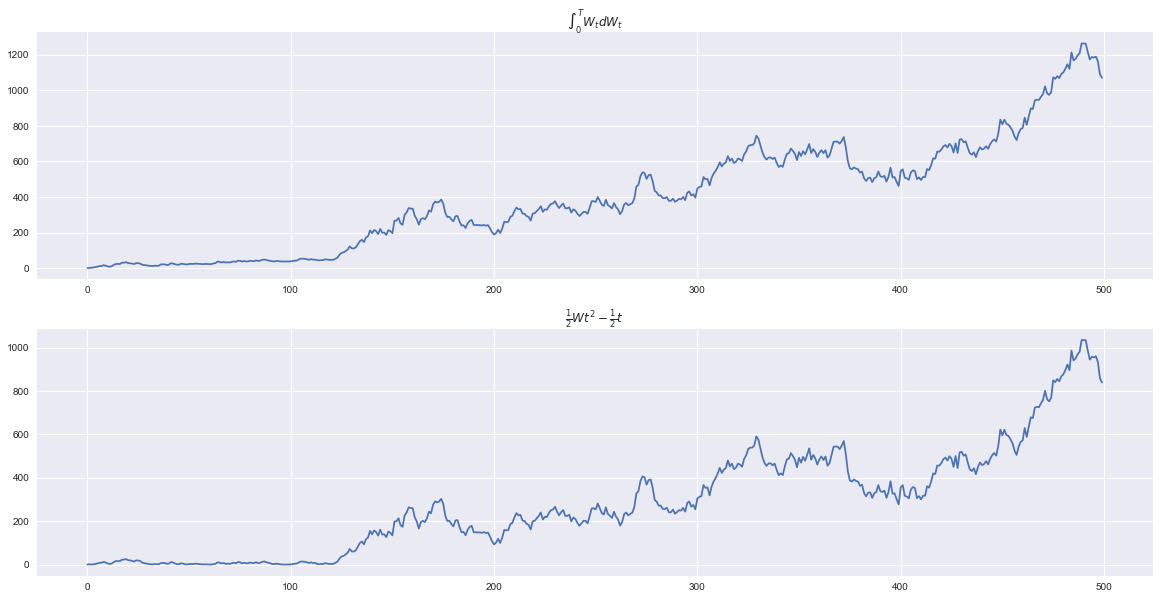

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
ax1.set_title(r"$\int_0^T W_t dW_t$")
ax1.plot(definition_integral)

ax2.set_title(r"$\frac{1}{2} Wt ^ 2 - \frac{1}{2} t$")
ax2.plot(solved_integral)
plt.show()

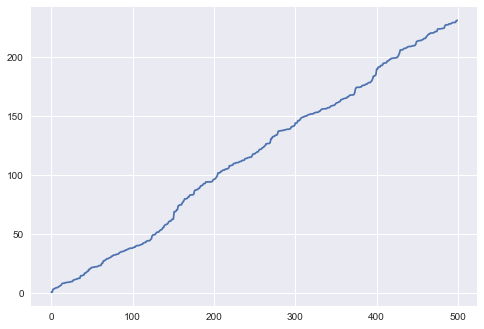

In [123]:
plt.plot(definition_integral - solved_integral)
plt.show()